In [1]:
#경고 끄기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

%matplotlib inline
plt.rc('font', family='Malgun Gothic')

In [3]:
df = pd.read_csv("1001.csv")

In [4]:
# 11,특
# 12,상
# 13,보통
# 1Z,무등급
df = df[(df['stdqlitynewcode'] == '11')
    | (df['stdqlitynewcode'] == '12')
    | (df['stdqlitynewcode'] == '13')
    | (df['stdqlitynewcode'] == '1Z')]

In [7]:
df = df[(df['stdspciesnewcode'] == 100104)]

In [8]:
# 경매 데이터
df = df[(df['aucsecode'] == 1)]

In [10]:
def pricTransform(df):
    #Kg당 가격(kgperprice)
    df['kgperprice'] = ''
    #총거래가격(totalprice) = 거래량(delngQy) * 가격(sbidpric)
    df['totalprice'] = ''
    #총량(totalweight) = 거래단량(delngprut) * 거래량(delngQy) * 단위
    df['totalweight'] = ''

    df11 = df[(df['stdunitnewcode']==11)]
    df12 = df[(df['stdunitnewcode']==12)]
    df13 = df[(df['stdunitnewcode']==13)]
    for df11 in [df11]:
        df11['kgperprice'] = df11['sbidpric'] / df11['delngprut'] * 1000
        df11['totalweight'] = df11['delngprut'] * df11['delngqy'] / 1000
    for df12 in [df12]:
        df12['kgperprice'] = df12['sbidpric'] / df12['delngprut']
        df12['totalweight'] = df12['delngprut'] * df12['delngqy']
    for df13 in [df13]:
        df13['kgperprice'] = df13['sbidpric'] / df13['delngprut'] / 1000
        df13['totalweight'] = df13['delngprut'] * df13['delngqy'] / 1000
    df = pd.concat([df11, df12, df13])

    for df in [df]:
        df['totalprice'] = df['sbidpric'] * df['delngqy']
        
    return df

In [11]:
df = pricTransform(df)

In [12]:
df['yyyy'] = df['delngde'].map(lambda x: str(x)[0:4])
df['mm'] = df['delngde'].map(lambda x: str(x)[4:6])
df['dd'] = df['delngde'].map(lambda x: str(x)[6:8])

In [13]:
new_df = pd.concat((df[['kgperprice','yyyy','mm']].groupby(['yyyy','mm']).mean(), df.groupby(['yyyy','mm'])[['totalprice','totalweight']].sum()), axis=1)

In [23]:
new_df.to_csv('mean_of_month_1.csv')

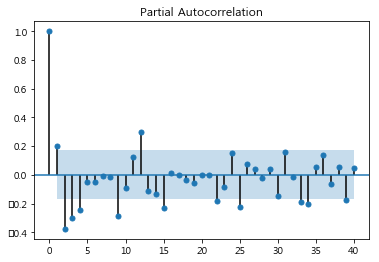

In [26]:
x_t  = new_df['kgperprice'][1:]
x_t1 = new_df['kgperprice'][:-1]
y = np.log(x_t.values / x_t1.values)
sm.graphics.tsa.plot_pacf(y, lags=40)
plt.show()

In [28]:
x_t1 = pd.Series(x_t1.values)
x_t = pd.Series(x_t.values)
x_t1.corr(x_t)

In [ ]:
df2 = df.groupby(['yyyy','mm'])[['kgperprice','totalprice','totalweight']].mean()

In [ ]:
df2.to_csv('mean_of_month_1.csv')